# Analysis of Microarray & Microtiter plates
Analysis of peptide-virus binding signals.

This notebook provides simple visualisation and analysis functions to work with experimental data sets from the FluType project.

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from weasyprint import HTML as HTML1
from flutype_analysis import analysis, utils, pca, correlation

In [2]:
data_ids = {'2017-05-12_MTP_R1',
            '2017-05-12_MTP_R1_div_back',
            'flutype_test',
            '2017-05-12_MTP_R1_sub_back', 
            'N10',
            "2017-05-19_N11_Cal", 
            'merge_2017-05-19_N11_Cal_N00010',
            '2017-05-19_N10_Pan'}

In [3]:
data_id = 'N00010'# carfull propabaly wrong labeling
directory = "../data/N00010" # carfull probably wrong labeling

##################################################################

#data_id = '2017-05-12_MTP_R1'
#data_id = '2017-05-12_MTP_R1_div_back'
#data_id = '2017-05-12_MTP_R1_sub_back'
#data_id = 'flutype_test'

#data_id = "2017-05-19_N11_Cal"
#directory = "../data/2017-05-19_N11_Cal"

#data_id = 'merge_2017-05-19_N11_Cal_N00010'
#directory ='../data/merge_2017-05-19_N11_Cal_N00010'





#data_id = '2017-05-19_N10_Pan'
#directory ='../data/2017-05-19_N10_Pan'


#data_id = "2017-05-19_N9_X31" 
#directory = "../data/2017-05-19_N9_X31" 
#data_id = "N9_N10_N11" 
#directory = "../data/N9_N10_N11" 

#data_id = "2017-05-19_E5_X31" 
#directory = "../data/2017-05-19_E5_X31"

data_id = "N9_N10_N11_E5_E6_N5_N6" 
directory = "../data/N9_N10_N11_E5_E6_N5_N6"

#data_id = "2017-05-19_N5_X31"
#directory = "../data/2017-05-19_N5_X31"

#data_id = "2017-05-19_E6_untenliegend_X31"
#directory = "../data/2017-05-19_E6_untenliegend_X31"

#data_id = "2017-05-19_N6_Pan"
#directory = "../data/2017-05-19_N6_Pan"


data = utils.load_data(data_id, directory)
ana = analysis.Analysis(data)




display(ana.spot.head(10))


--------------------------------------------------------------------------------
Loading data corresponding to data_id: <N9_N10_N11_E5_E6_N5_N6> in dir <../data/N9_N10_N11_E5_E6_N5_N6>
--------------------------------------------------------------------------------
Virus .gal:../data/N9_N10_N11_E5_E6_N5_N6/N9_N10_N11_E5_E6_N5_N6_vir.gal
Peptide .gal :../data/N9_N10_N11_E5_E6_N5_N6/N9_N10_N11_E5_E6_N5_N6_pep.gal
Meta  :../data/N9_N10_N11_E5_E6_N5_N6/N9_N10_N11_E5_E6_N5_N6.meta
Spot intensity file  :../data/N9_N10_N11_E5_E6_N5_N6/N9_N10_N11_E5_E6_N5_N6.csv
Spot intensities for the data ID (N9_N10_N11_E5_E6_N5_N6) are not averaged but primary values


,Column,Row,Peptide,Reference,Virus,Buffer,No_Peptide,Intensity,Std,Replica
0,1,1,DYE100,True,X31,False,False,848828,NaN,0
1,1,2,NO,False,X31,False,True,3365,NaN,0
2,1,3,NO,False,X31,False,True,1005,NaN,1
3,1,4,NO,False,X31,False,True,2675,NaN,2
4,1,5,NO,False,X31,False,True,4187,NaN,3
5,1,6,NO,False,X31,False,True,3434,NaN,4
6,1,7,NO,False,X31,False,True,9398,NaN,5
7,1,8,DYE100,True,X31,False,False,929183,NaN,1
8,1,9,NO,False,X31,False,True,5070,NaN,6
9,1,10,NO,False,X31,False,True,3835,NaN,7


## Heatmap of array/plate with peptide and virus information

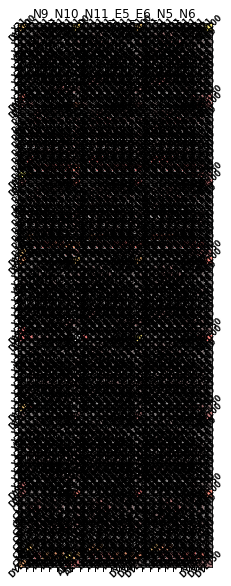

In [4]:
# shows figure
fig = ana.heatmap(figsize=(20,10))

plt.title(data_id,fontsize="large")

utils.assure_path_exists("../results/"+data_id+"/")
fig.savefig("../results/{}/{}_heatmap1.png".format(data_id,data_id),bbox_inches='tight')
plt.show()

## Heatmap mini

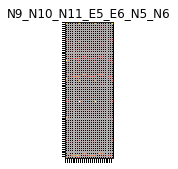

In [5]:
#fig = Ana.heatmap(descript=False,nrows=1,ncols=1,figsize=(5,2.5))
fig = ana.heatmap(descript=False,figsize=(5,2.5))
plt.title(data_id,fontsize="large")
plt.show()
utils.assure_path_exists("../results/"+data_id+"/")

fig.savefig("../results/{}/{}_heatmap2.png".format(data_id,data_id),bbox_inches='tight')

## Only description

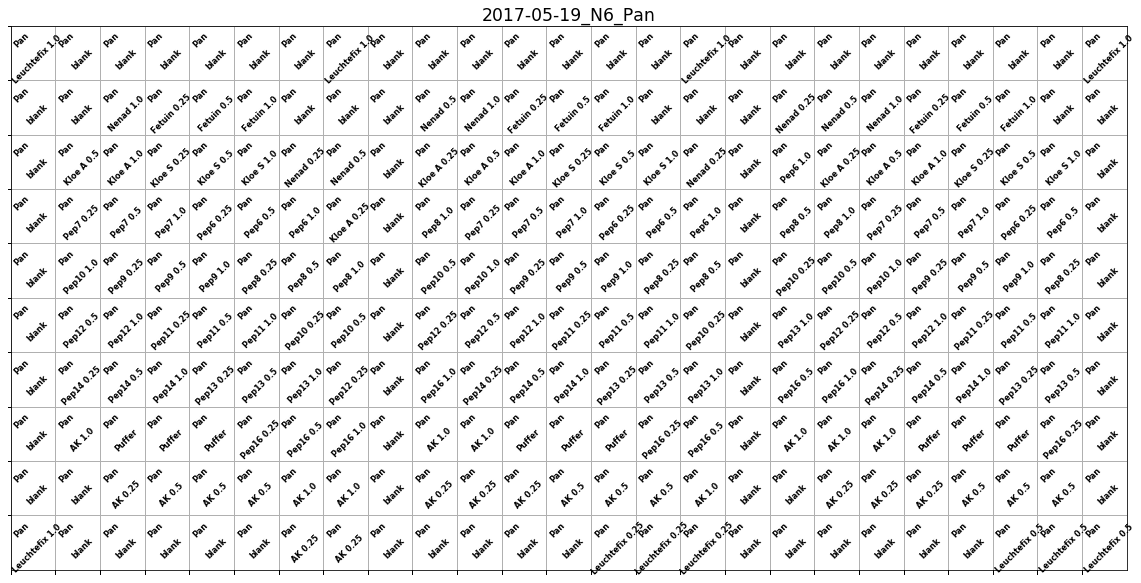

In [53]:
fig = ana.heatmap(heatmap=False,figsize=(20,10))
plt.title(data_id,fontsize="xx-large")
plt.show()

## Barplot aligned to peptides

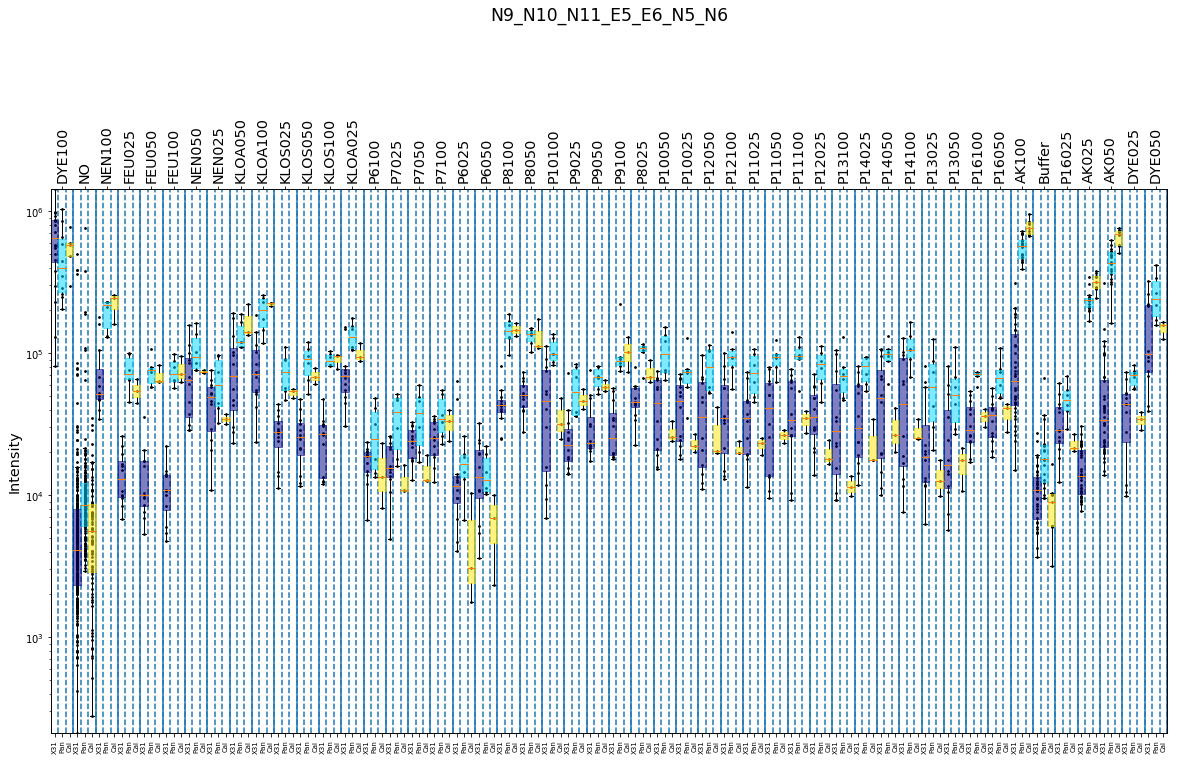

In [5]:
fig = ana.barplot(scale="log",figsize=(20,10))
plt.title(data_id,y=1.30,fontsize="xx-large")
utils.assure_path_exists("../results/"+data_id+"/")
fig.savefig("../results/{}/{}_barplot_pep.png".format(data_id,data_id),bbox_inches='tight')
plt.show()

## Barplot aligned to virus

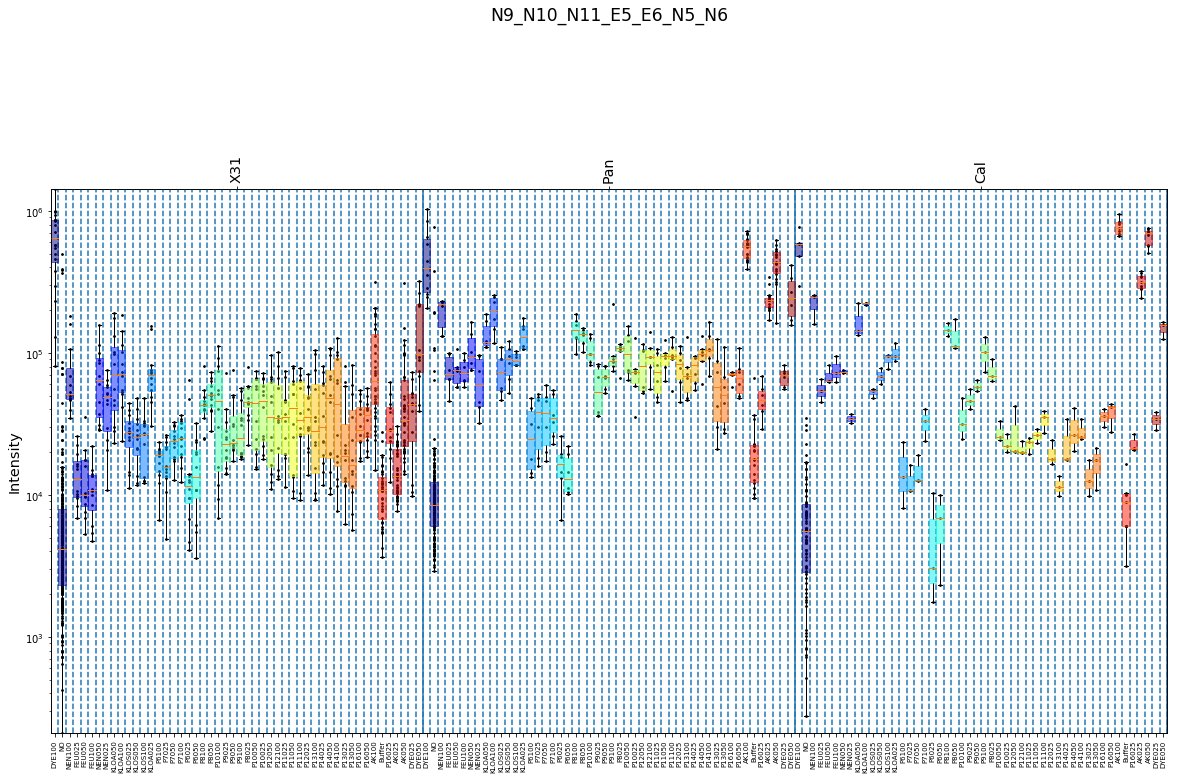

In [9]:
fig = ana.barplot(scale="log",align="vir",figsize=(20,10))
plt.title(data_id,y=1.30,fontsize="xx-large")
utils.assure_path_exists("../results/"+data_id+"/")
fig.savefig("../results/{}/{}_barplot_vir.png".format(data_id,data_id),bbox_inches='tight')
plt.show()

## PCA 2D Plot

,Pca_Component_1,Pca_Component_2
NEN100,0.400952,0.301204
KLOA100,0.394287,0.255532
P8100,0.267975,0.091386
P9100,0.234842,0.041313
KLOA050,0.223374,0.238048
P8050,0.209242,0.067957
KLOS100,0.187592,0.057075
KLOS050,0.179431,0.028433
FEU050,0.173521,0.013336
FEU100,0.171363,0.044276


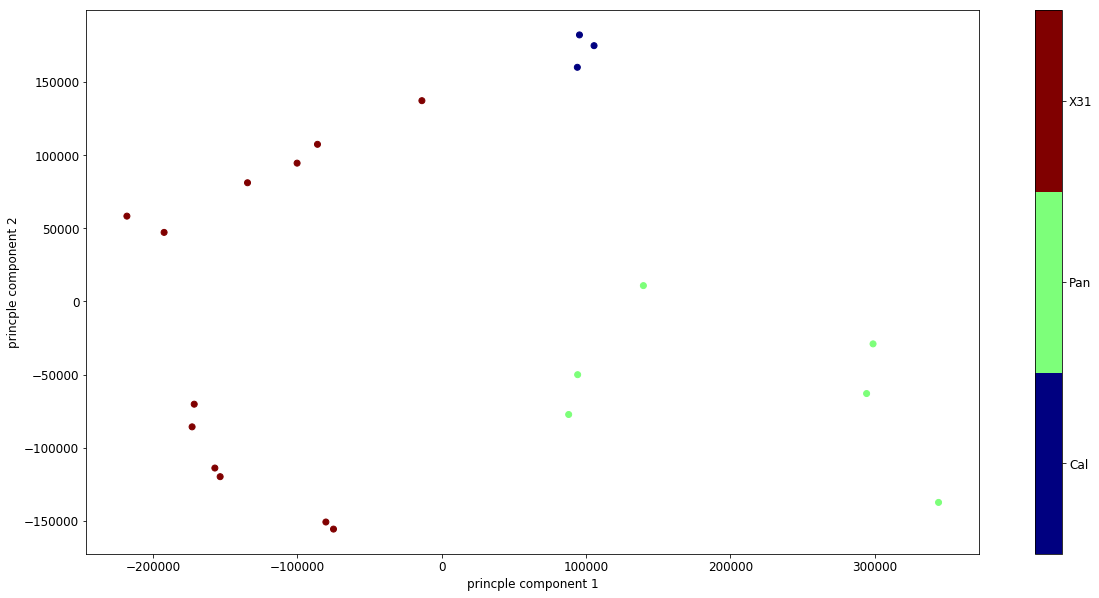

In [18]:
antibody = False

data_pca = ana.classifier(type="PCA",antibody = antibody )
display(data_pca[2])

fig = pca.pca_2dplot(data_pca[0],figsize=(20,10))
utils.assure_path_exists("../results/"+data_id+"/")
fig.savefig("../results/{}/{}_pca.png".format(data_id,data_id),bbox_inches='tight')
plt.show()

html_out=ana.components_to_html(antibody = antibody)
HTML1(string=html_out).write_pdf("../results/{}/{}.pdf".format(data_id,data_id), stylesheets=["../html/style.css"])


In [8]:
data_pca[2]/abs(data_pca[2]).sum()

,Pca_Component_1,Pca_Component_2
P9050,0.069759,0.061883
FEU100,0.054144,0.015593
P6100,0.052368,-0.037600
KLOS025,0.048142,0.069126
FEU025,0.043545,0.017884
KLOS100,0.039243,0.042418
FEU050,0.034384,0.031619
P10025,0.031174,0.013225
P8100,0.018011,0.007064
P16100,0.017049,0.064540


['Cal' 'Cal' 'Cal' 'Pan' 'Pan' 'Pan' 'Pan' 'Pan' 'Pan' 'X31' 'X31' 'X31'
 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31']


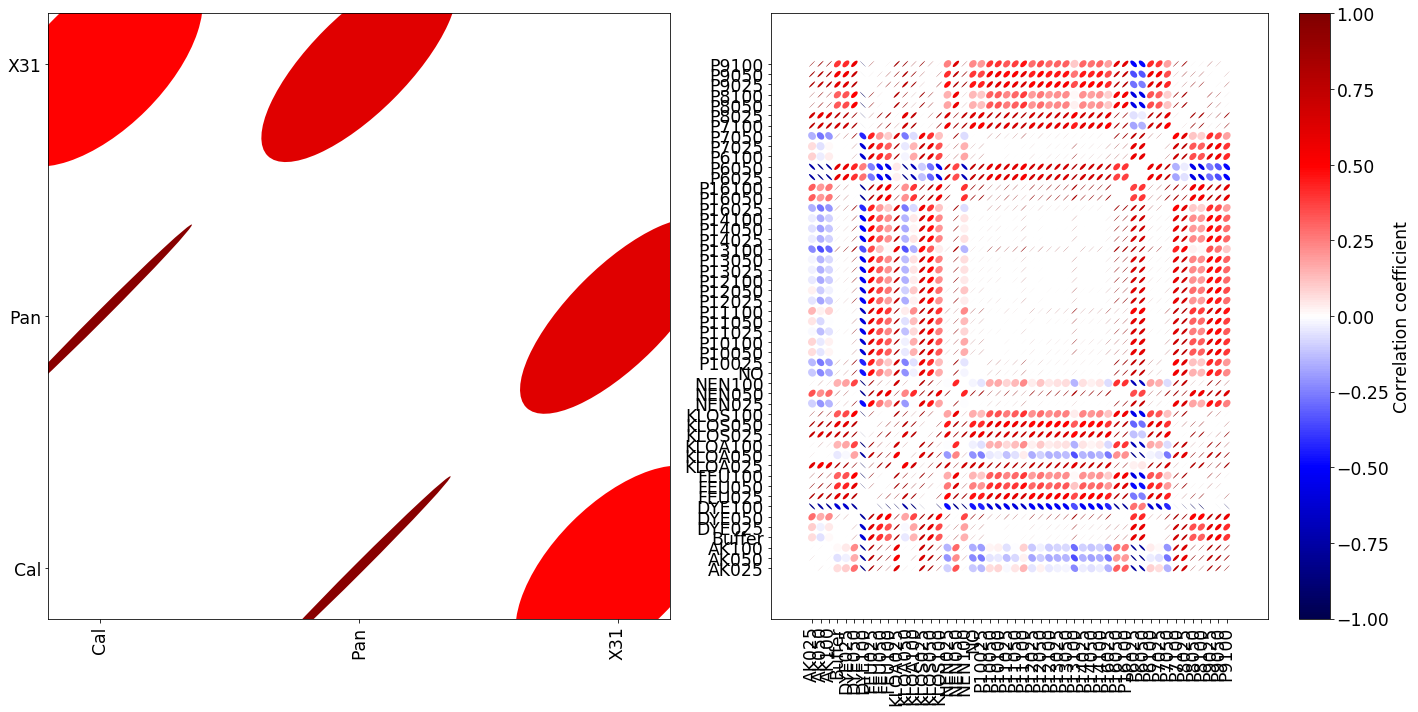

In [7]:
fig = ana.correlation_plot(type="both",figsize=(20,10))
fig.savefig("../results/{}/{}_corr_matrix_plot.png".format(data_id,data_id),bbox_inches='tight')
plt.show()